In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the payoff functions for each options strategy
def option_payoff(stock_price, strike_price, premium, slope, option_type):
    if option_type == "buy_call":
        return np.maximum(slope * (stock_price - strike_price), 0) - premium
    elif option_type == "buy_put":
        return np.maximum(slope * (strike_price - stock_price), 0) - premium
    elif option_type == "write_call":
        return premium - np.maximum(slope * (stock_price - strike_price), 0)
    elif option_type == "write_put":
        return premium - np.maximum(slope * (strike_price - stock_price), 0)
    else:
        raise ValueError("Invalid option type. Choose from 'buy_call', 'buy_put', 'write_call', or 'write_put'.")

# Function to add a specific option curve to the plot and accumulate the total payoff
def add_option_curve(stock_price_range, strike_price, premium, slope, option_type, label, total_payoff):
    payoff = option_payoff(stock_price_range, strike_price, premium, slope, option_type)
    #plt.plot(stock_price_range, payoff, label=label)
    return total_payoff + payoff

# Main function to overlay multiple option strategies and show total payoff
def plot_combined_strategy(stock_price_range, options_params):
    # Initialize the plot
    #plt.figure(figsize=(12, 8))
    
    # Initialize the total payoff to zero
    total_payoff = np.zeros_like(stock_price_range, dtype=float)
    
    # Loop through the list of options parameters and add each option curve, accumulating the total payoff
    for params in options_params:
        total_payoff = add_option_curve(
            stock_price_range,
            strike_price=params['strike_price'],
            premium=params['premium'],
            slope=params['slope'],
            option_type=params['option_type'],
            label=params['label'],
            total_payoff=total_payoff
        )
    
    # # Plot the total payoff curve
    # plt.plot(stock_price_range, total_payoff, label='Total Combined Strategy', color='black', linewidth=2, linestyle='--')
    
    # # Plot settings
    # plt.axhline(0, color='black', linewidth=0.5)
    # plt.xlabel('Stock Price at Expiration')
    # plt.ylabel('Profit/Loss')
    # plt.title('Profit and Loss Profile for Combined Options Strategy')
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    
    # Plot the net combined payoffs separately
    plt.figure(figsize=(12, 8))
    plt.plot(stock_price_range, total_payoff, label='Net Combined Payoff', color='red', linewidth=2)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Net Payoff')
    plt.title('Net Combined Payoff for Options Strategy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Define the stock price range for plotting
stock_price_range = np.linspace(50, 150, 100)

delta_call = 1
delta_put = 1

call_premium = 5
put_premium = 5

In [17]:
# options_params = [
#     {
#         'strike_price': 110,
#         'premium': call_premium,
#         'slope': delta_call,
#         'option_type': 'buy_call',
#         'label': 'Buy Call'
#     },
#     # {
#     #     'strike_price': 95,
#     #     'premium': put_premium,
#     #     'slope': delta_put,
#     #     'option_type': 'buy_put',
#     #     'label': 'Buy Put'
#     # },
#     {
#         'strike_price': 90,
#         'premium': call_premium,
#         'slope': delta_call,
#         'option_type': 'write_call',
#         'label': 'Write Call'
#     },
#     {
#         'strike_price': 90,
#         'premium': put_premium,
#         'slope': delta_put,
#         'option_type': 'write_put',
#         'label': 'Write Put'
#     }
# ]

# # Plot the combined strategy
# plot_combined_strategy(stock_price_range, options_params)

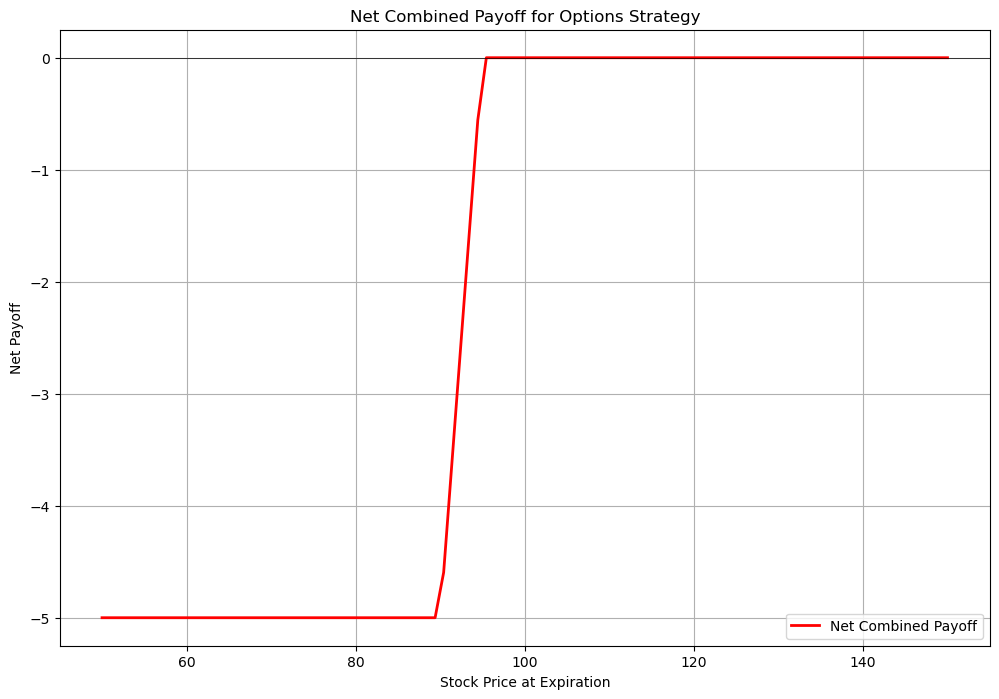

In [19]:
iron_condor_params = [
    {
        'strike_price': 90,
        'premium': put_premium,
        'slope': delta_put,
        'option_type': 'buy_put',
        'label': 'Buy Put'
    },
    {
        'strike_price': 95,
        'premium': put_premium,
        'slope': delta_put,
        'option_type': 'write_put',
        'label': 'Write Put'
    },
    # {
    #     'strike_price': 115,
    #     'premium': call_premium,
    #     'slope': delta_call,
    #     'option_type': 'write_call',
    #     'label': 'Write Call'
    # },
    # {
    #     'strike_price': 120,
    #     'premium': call_premium,
    #     'slope': delta_call,
    #     'option_type': 'buy_call',
    #     'label': 'Buy Call'
    # }
]

# Plot the iron condor strategy
plot_combined_strategy(stock_price_range, iron_condor_params)